## Estadística Aplicada

Sesión 8 - 7 septiembre

Alexandra Guadalupe Valdez Mireles 

1910361

Gpo 44

In [1]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Librería Especializada
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [6]:
# datos
ejer_km = pd.read_excel('ejercicio_km.xlsx')

In [7]:
ejer_km.head()

,indiv,tiempo_sup,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [8]:
# Modelo Kaplan-Meier
km1 = KaplanMeierFitter().fit(ejer_km['tiempo_sup'],ejer_km['evento'])

In [9]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [10]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


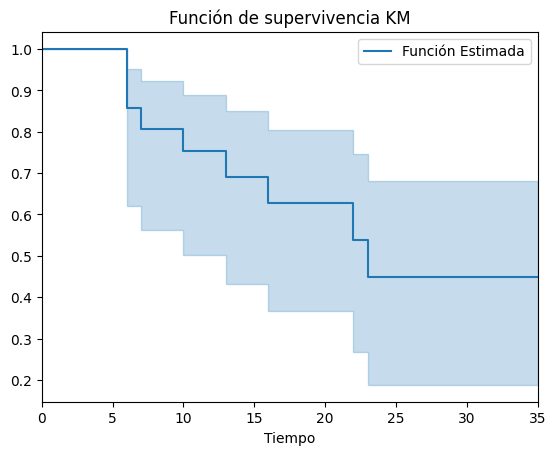

In [12]:
# Gráfica
km1.plot_survival_function(label='Función Estimada')
plt.title('Función de supervivencia KM')
plt.xlabel('Tiempo')
plt.xlim(0,35);

Revisar una nueva base de datos

In [13]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [14]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [15]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

La base de datos contiene la información de 42 individuos que se encuentran en una relación, "t" es el tiempo de la relación de supervivencia de la relación, el evento es "relación terminada" está en la columna estado, 1: la relación terminó, 0: dato censurado. La variable tratamiento contiene 0 y 1, 0 es si la persona no era detallista en la relación y 1 es si la persona era detallista en la relación. Que sea detallista es que hiciera un regalo a la semana a su pareja (flor, paleta, oso, etc.)

In [16]:
km_all = KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

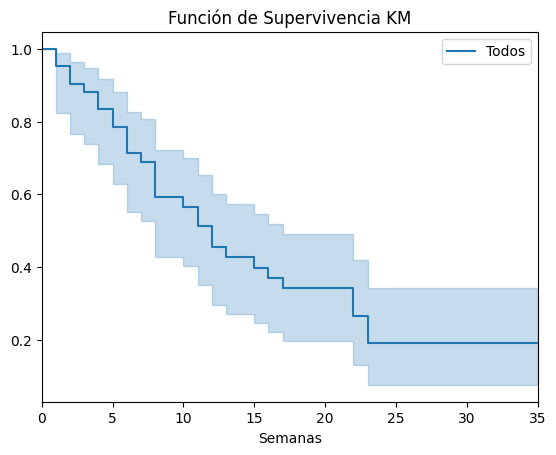

In [18]:
km_all.plot_survival_function(label='Todos')
plt.title('Función de Supervivencia KM')
plt.xlabel('Semanas')
plt.xlim(0,35);

In [19]:
## Dividir datos
detallistas = relacion.query('tratamiento==1')
no_detallistas = relacion.query('tratamiento==0')

In [21]:
detallistas.head()

,tratamiento,t,estado
21,1,6,1
22,1,6,1
23,1,6,1
24,1,6,0
25,1,7,1


In [22]:
no_detallistas.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [23]:
## Estimar funciones de supervivencia para detallistas y no detallistas
km_deta = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nodeta = KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

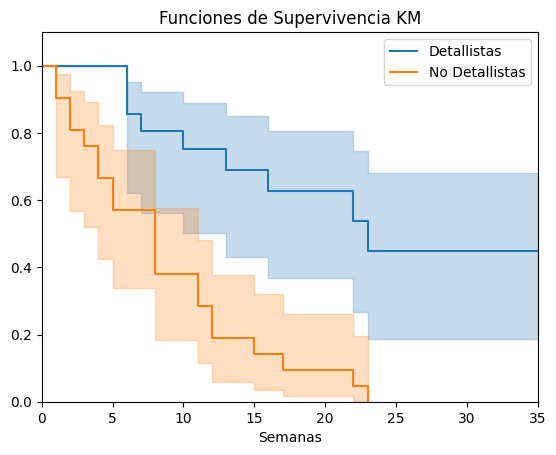

In [27]:
## Graficar
km_deta.plot_survival_function(label='Detallistas')
km_nodeta.plot_survival_function(label='No Detallistas')
plt.title('Funciones de Supervivencia KM')
plt.xlim(0,35)
plt.ylim(0,1.1)
plt.xlabel('Semanas');

Para verificar que las funciones de supervivencia son distintas realizaremos una prueba de hipótesis (log rank test)

# log rank test

$Ho: S(1)=S(2) $ Funciones de supervivencia idénticas

$Ha: S(1)\neq S(2) $ Funciones de supervivencia distintas

In [28]:
# gpo1 detallistas, gpo2 no detallistas
# LRT = logrank_test(tiempog1, tiempog2, eventog1, eventog2)
LRT = logrank_test(detallistas['t'], no_detallistas['t'], detallistas['estado'], no_detallistas['estado'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [32]:
print(LRT.p_value.round(4))

0.0


In [36]:
print('Como pvalue =', LRT.p_value.round(3), '<', 0.05, '\nRechazamos Ho, significa que \nlas funciones de supervivencia son distintas, \npor lo tanto los no detallistas terminan su relación más rápido que los detallistas')

Como pvalue = 0.0 < 0.05 
Rechazamos Ho, significa que 
las funciones de supervivencia son distintas, 
por lo tanto los no detallistas terminan su relación más rápido que los detallistas
